# Finding the best approach for each discourse type

![](https://blog.inkforall.com/wp-content/uploads/2019/07/myalt-207914158.png)


  <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4a8fdd;font-family:newtimeroman;color:#FFF9ED;font-size:300%;text-align:center;border-radius:9px 9px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING NECESARY LIBRARIES](#1)

* [2. DATASET](#2)

* [3. DATA VISUALIZATION](#3)
    
    * [3.1. Unique values](#3.1)   
    * [3.2. Types repartition](#3.2)
    
    
* [4. DATA CLEANING](#4)
    
* [5. DATA ANALYSIS](#5)
    
    * [5.1. Most frequent words](#5.1)   
    * [5.2. Wordclouds](#5.2)
    
    
* [6. VECTORIZATION](#6)
    
    * [6.1. Common functions](#6.1)   
    * [6.2. TF-IDF](#6.2)
    * [6.3. Universal Sentence Encoder](#6.3)   
    * [6.4. BERT](#6.4)
    
    
* [7. CLASSIFIERS COMPARISON](#7)
    
    * [7.1. Evaluation](#7.1)   
    * [7.2. Classifiers list](#7.2)
    * [7.3. Split Train/Test](#7.3)   
    * [7.4. Baseline](#7.4)
    * [7.5. Models comparison](#7.5)
    * [7.6. Cross-Validation](#7.6)
    
    
* [8. SPLITTING TYPES](#8)
    
    * [8.1. Models comparison](#8.1)
    * [8.2. Cross-Validation](#8.2)
    * [8.3. Overall performances](#8.3)
    
    
* [9. MIXING THE MODELS](#9)
    
    * [9.1. Data subsets comparison](#9.1)
    * [9.2. Performances](#9.2)
    * [9.3. Saving the parameters](#9.3)
    
    
* [10. MAKING THE PREDICTIONS](#10)
    
    * [10.1. Training the model](#10.1)
    * [10.2. Vectorizing text data](#10.2)
    * [10.3. Generating predictions](#10.3)

<a id="1"></a>

## <b>1 <span style='color:#4a8fdd'>|</span> IMPORTING NECESARY LIBRARIES</b>



We'll use <i>numpy</i> and <i>pandas</i> to manipulate arrays and dataframes. <i>Pyplot</i>, <i>plotly</i> and <i>seaborn</i> will help for visualizations, while <i>string</i> and <i>re</i> are useful for text cleaning via regular expressions.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import string
import re

<a id="2"></a>

## <b>2 <span style='color:#4a8fdd'>|</span> DATASET</b>

Three files are available:
 - <i>train.csv</i> contains the training data,
 - <i>test.csv</i> contains testing data for submission purposes,
 - <i>sample_submission.csv</i> is an exemple of submission's format.

In [2]:
train = pd.read_csv('../input/feedback-prize-effectiveness/train.csv')
print(train.shape)
train.head()

(36765, 5)


discourse_id      essay_id  \
0  0013cc385424  007ACE74B050   
1  9704a709b505  007ACE74B050   
2  c22adee811b6  007ACE74B050   
3  a10d361e54e4  007ACE74B050   
4  db3e453ec4e2  007ACE74B050   

                                      discourse_text discourse_type  \
0  Hi, i'm Isaac, i'm going to be writing about h...           Lead   
1  On my perspective, I think that the face is a ...       Position   
2  I think that the face is a natural landform be...          Claim   
3  If life was on Mars, we would know by now. The...       Evidence   
4  People thought that the face was formed by ali...   Counterclaim   

  discourse_effectiveness  
0                Adequate  
1                Adequate  
2                Adequate  
3                Adequate  
4                Adequate

In [3]:
test = pd.read_csv('../input/feedback-prize-effectiveness/test.csv')
print(test.shape)
test.head()

(10, 4)


discourse_id      essay_id  \
0  a261b6e14276  D72CB1C11673   
1  5a88900e7dc1  D72CB1C11673   
2  9790d835736b  D72CB1C11673   
3  75ce6d68b67b  D72CB1C11673   
4  93578d946723  D72CB1C11673   

                                      discourse_text discourse_type  
0  Making choices in life can be very difficult. ...           Lead  
1  Seeking multiple opinions can help a person ma...       Position  
2                     it can decrease stress levels           Claim  
3             a great chance to learn something new           Claim  
4               can be very helpful and beneficial.           Claim

In [4]:
submit = pd.read_csv('../input/feedback-prize-effectiveness/sample_submission.csv')
print(submit.shape)
submit.head()

(10, 4)


discourse_id  Ineffective  Adequate  Effective
0  a261b6e14276         0.20      0.60       0.40
1  5a88900e7dc1         3.00      6.00       1.00
2  9790d835736b         1.00      2.00       3.00
3  75ce6d68b67b         0.33      0.34       0.33
4  93578d946723         0.01      0.24       0.47

<a id="3"></a>

## <b>3 <span style='color:#4a8fdd'>|</span> DATA VISUALIZATION</b>


<a id="3.1"></a>

#### <b>3.1 <span style='color:#4a8fdd'>|</span> Unique values</b>

Let's start with counting the unique values for each variables, and listing the different <i>discourse_type</i> available.

In [5]:
print(train.shape[0], "entries")
train.nunique()

36765 entries


discourse_id               36765
essay_id                    4191
discourse_text             36691
discourse_type                 7
discourse_effectiveness        3
dtype: int64

In [6]:
discourse_types = set(train["discourse_type"].values)
print(discourse_types)

{'Rebuttal', 'Counterclaim', 'Claim', 'Concluding Statement', 'Evidence', 'Position', 'Lead'}


<a id="3.2"></a>

#### <b>3.2 <span style='color:#4a8fdd'>|</span> Types repartition</b>

We have seven different types of discourse, and three <i>discourse_effectiveness</i> possible values. Let's check the repartition of these variables in our dataset.

In [7]:
def proportions_pie(data, col, title):
    counts = data[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', radius=2)
    plt.axis('equal')
    plt.title(title)
    plt.show()

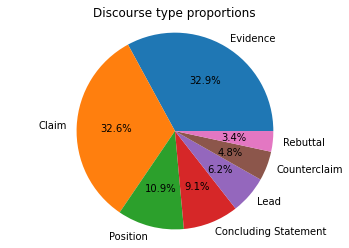

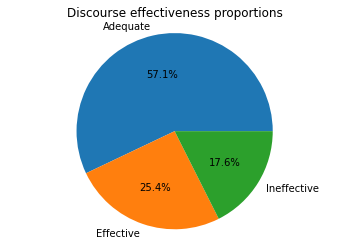

In [8]:
proportions_pie(train, 'discourse_type', 'Discourse type proportions')
proportions_pie(train, 'discourse_effectiveness', 'Discourse effectiveness proportions')

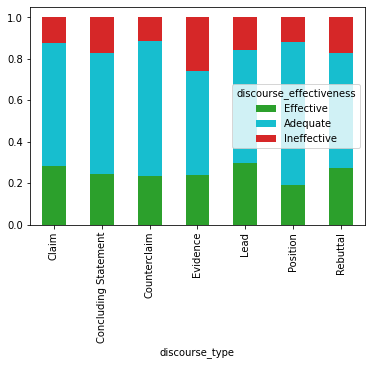

In [9]:
counts = train.groupby(by='discourse_type')["discourse_effectiveness"].value_counts(normalize=True).unstack(fill_value=0)
counts[['Effective', 'Adequate', 'Ineffective']].plot.bar(stacked=True, color=['tab:green', 'tab:cyan', 'tab:red'])
plt.show()

<a id="4"></a>

## <b>4 <span style='color:#4a8fdd'>|</span> DATA CLEANING</b>

We make a first cleaning by filling the <i>NaN</i> values before removing the <i>HTML</i> tags, the <i>digits</i> and the unnecessary <i>whitespaces</i>.

In [10]:
def cleaning(text_data):
    text_data = text_data.fillna("")
    text_data = text_data.apply(lambda x: re.sub(r'\<[^\>]*\>', ' ', x))
    text_data = text_data.apply(lambda x: re.sub(r'\d+', '', x))
    text_data = text_data.apply(lambda x: re.sub(rf"[{re.escape(string.whitespace)}]+", ' ', x))
    return text_data

In [11]:
data = train[['discourse_text', 'discourse_type', 'discourse_effectiveness']]
data['clean_text'] = cleaning(data['discourse_text'])
data.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


discourse_text discourse_type  \
0  Hi, i'm Isaac, i'm going to be writing about h...           Lead   
1  On my perspective, I think that the face is a ...       Position   
2  I think that the face is a natural landform be...          Claim   
3  If life was on Mars, we would know by now. The...       Evidence   
4  People thought that the face was formed by ali...   Counterclaim   

  discourse_effectiveness                                         clean_text  
0                Adequate  Hi, i'm Isaac, i'm going to be writing about h...  
1                Adequate  On my perspective, I think that the face is a ...  
2                Adequate  I think that the face is a natural landform be...  
3                Adequate  If life was on Mars, we would know by now. The...  
4                Adequate  People thought that the face was formed by ali...

Some vectorization techniques require further cleaning, namely removing the <i>punctuations</i>, the <i>uppercase</i> characters and the <i>stopwords</i>. We shall alos <b>lemmatize</b> the words thanks to the package <i>nltk</i>.

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def more_cleaning(text_data):
    punctuations = '.,!?:;-=..."@#_()' + "'"
    text_data = text_data.apply(lambda x: re.sub(rf'[{punctuations}]', ' ', x))
    text_data = text_data.apply(lambda x: x.lower())
    stop = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    text_data = text_data.apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split(" ") if lemmatizer.lemmatize(word) not in stop]))
    text_data = text_data.apply(lambda x: re.sub(rf"[{re.escape(string.whitespace)}]+", ' ', x))
    text_data = text_data.fillna("")
    return text_data

In [13]:
data['cleaner_text'] = more_cleaning(data["clean_text"])
data.head()

discourse_text discourse_type  \
0  Hi, i'm Isaac, i'm going to be writing about h...           Lead   
1  On my perspective, I think that the face is a ...       Position   
2  I think that the face is a natural landform be...          Claim   
3  If life was on Mars, we would know by now. The...       Evidence   
4  People thought that the face was formed by ali...   Counterclaim   

  discourse_effectiveness                                         clean_text  \
0                Adequate  Hi, i'm Isaac, i'm going to be writing about h...   
1                Adequate  On my perspective, I think that the face is a ...   
2                Adequate  I think that the face is a natural landform be...   
3                Adequate  If life was on Mars, we would know by now. The...   
4                Adequate  People thought that the face was formed by ali...   

                                        cleaner_text  
0  hi isaac going writing face mar natural landfo...  
1  perspective think face natural landform dont t...  
2  think face natural landform life mar descovere...  
3  life wa mar would know reason think natural la...  
4  people thought face wa formed alieans thought ...

<a id="5"></a>

## <b>5 <span style='color:#4a8fdd'>|</span> DATA ANALYSIS</b>


<a id="5.1"></a>

#### <b>5.1 <span style='color:#4a8fdd'>|</span> Most frequent words</b>

Let's see the 50 most frequent words in our dataset, with both cleaning techniques.

In [14]:
def top_words(text_data, normalize=False):
    pattern = (rf"((\w)[{string.punctuation}](?:\B|$)|(?:^|\B)[{string.punctuation}](\w))")
    return (text_data.apply(lambda x: x.replace(pattern, r"\2 \3").split()).explode().value_counts(normalize=normalize))

def frequency_barplot(df, nr_top_words=50):
    fig, ax = plt.subplots(1,1,figsize=(20,5))
    df.sort_values(ascending=False, inplace = True)
    sns.barplot(list(range(nr_top_words)), df.values[:nr_top_words], palette='hls', ax=ax)
    ax.set_xticks(list(range(nr_top_words)))
    ax.set_xticklabels(df.index[:nr_top_words], fontsize=14, rotation=90)
    return ax

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


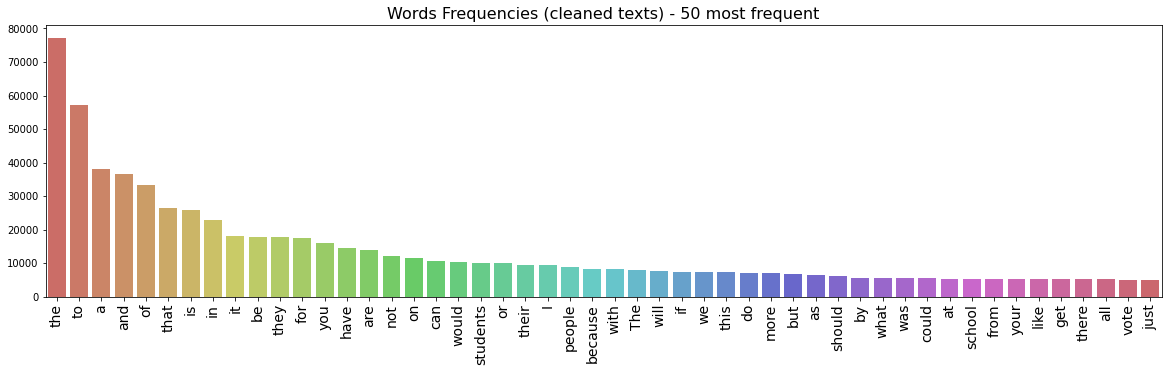

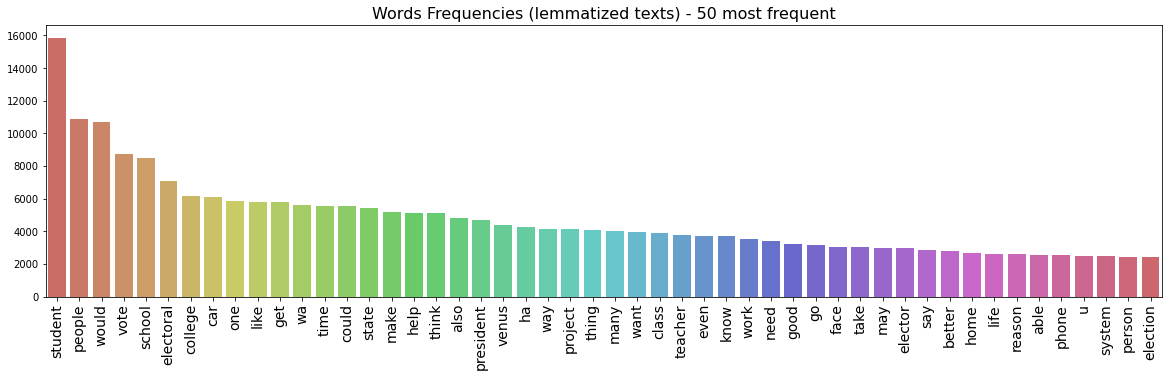

In [15]:
nbr_words = 50

words_org = top_words(data['clean_text']).head(nbr_words)
words_cln = top_words(data['cleaner_text']).head(nbr_words)

ax = frequency_barplot(words_org)
ax.set_title("Words Frequencies (cleaned texts) - 50 most frequent", fontsize=16);
ax = frequency_barplot(words_cln)
ax.set_title("Words Frequencies (lemmatized texts) - 50 most frequent", fontsize=16);

<a id="5.2"></a>

#### <b>5.2 <span style='color:#4a8fdd'>|</span> Wordclouds</b>

<i>Wordclouds</i> are a great way to visualize the most frequent word and their relative importance.

In [16]:
#from collections import Counter
from wordcloud import WordCloud

def draw_wordcloud(text_data, max_words=200, colormap='viridis', figsize=(20,10)):
    words = top_words(text_data)
    wordcloud = WordCloud(width=800, height=400, max_words=max_words, min_font_size=4, background_color="WHITE",
        max_font_size=None, relative_scaling='auto', colormap=colormap).generate_from_frequencies(words)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")

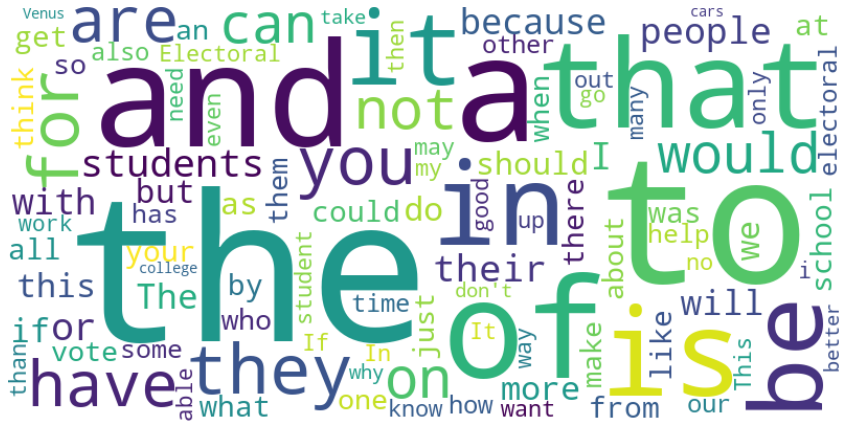

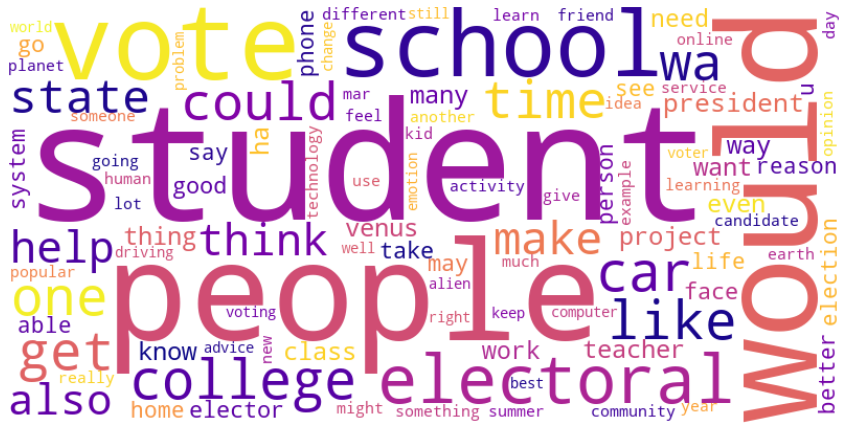

In [17]:
draw_wordcloud(data['clean_text'], max_words=100, colormap='viridis', figsize=(15,8))
draw_wordcloud(data['cleaner_text'], max_words=100, colormap='plasma', figsize=(15,8))

<a id="6"></a>

## <b>6 <span style='color:#4a8fdd'>|</span> VECTORIZATION</b>

<a id="6.1"></a>

#### <b>6.1 <span style='color:#4a8fdd'>|</span> Common functions</b>

For every vectorization we shall implement, we will need to visualize the data via a <i>scatterplot</i> after a <i>dimensional reduction</i>. The latter will be obtained by a <i>t-SNE</i> algorithm.

In [18]:
from sklearn.manifold import TSNE

list_vector = []

def scatterplot(data, col, color = None, hover_name = None, hover_data = None, title = ""):
    plot_values = np.stack(data[col], axis=1)
    dimension = len(plot_values)
    if dimension < 2 or dimension > 3:
        print("The column you want to visualize has dimension < 2 or dimension > 3.")
        print(" The function can only visualize 2- and 3-dimensional data.")
    else:
        if dimension == 2:
            x, y = plot_values[0], plot_values[1]
            fig = px.scatter(data, x=x, y=y, color=color, hover_data=hover_data, title=title, hover_name=hover_name)
        else:
            x, y, z = plot_values[0], plot_values[1], plot_values[2]
            fig = px.scatter_3d(data, x=x, y=y, z=z, color=color, hover_data=hover_data, title=title, hover_name=hover_name)
        fig.show()
        
def tsne(data, n_components=2, perplexity=30.0, learning_rate=200.0, n_iter=1000, random_state=None, n_jobs=-1):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter,
        random_state=random_state, n_jobs=n_jobs)
    if isinstance(data, pd.DataFrame):
        data_coo = data.sparse.to_coo()
        data_for_vectorization = data_coo.astype("float64")
    else:
        data_for_vectorization = list(data)
    return pd.Series(list(tsne.fit_transform(data_for_vectorization)), index=data.index)


<a id="6.2"></a>

#### <b>6.2 <span style='color:#4a8fdd'>|</span> TF-IDF</b>

Each variable will correspond to a word in the corpus, and each text will have coefficients proportional to the frequence of such word in said text <b>but also</b> to the inverse frequency in the complete corpus, making common words less important than specific ones.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def tokenize(text_data):
    punct = string.punctuation.replace("_", "")
    pattern = rf"((\w)([{punct}])(?:\B|$)|(?:^|\B)([{punct}])(\w))"
    return text_data.apply(lambda x: x.replace(pattern, r"\2 \3 \4 \5").split())

def tfidf(text_data, max_features=None, min_df=1, max_df=1.0):
    if not isinstance(text_data.iloc[0], list):
        text_data = tokenize(text_data)
    tfidf = TfidfVectorizer(use_idf=True, max_features=max_features, min_df=min_df, max_df=max_df,
        tokenizer=lambda x: x, preprocessor=lambda x: x, norm=None)
    tfidf_vectors_csr = tfidf.fit_transform(text_data)
    features = tfidf.get_feature_names()
    return (pd.Series(tfidf_vectors_csr.todense().tolist(), text_data.index), features, tfidf)

In [20]:
(data['TF-IDF'], text_features, tfidf_vectorizer) = tfidf(data['cleaner_text'], max_features=1000)
list_vector.append('TF-IDF')
data.head()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


discourse_text discourse_type  \
0  Hi, i'm Isaac, i'm going to be writing about h...           Lead   
1  On my perspective, I think that the face is a ...       Position   
2  I think that the face is a natural landform be...          Claim   
3  If life was on Mars, we would know by now. The...       Evidence   
4  People thought that the face was formed by ali...   Counterclaim   

  discourse_effectiveness                                         clean_text  \
0                Adequate  Hi, i'm Isaac, i'm going to be writing about h...   
1                Adequate  On my perspective, I think that the face is a ...   
2                Adequate  I think that the face is a natural landform be...   
3                Adequate  If life was on Mars, we would know by now. The...   
4                Adequate  People thought that the face was formed by ali...   

                                        cleaner_text  \
0  hi isaac going writing face mar natural landfo...   
1  perspective think face natural landform dont t...   
2  think face natural landform life mar descovere...   
3  life wa mar would know reason think natural la...   
4  people thought face wa formed alieans thought ...   

                                              TF-IDF  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...

In [21]:
data['TF-IDF 2D'] = tsne(data['TF-IDF'])
scatterplot(data, col='TF-IDF 2D', title="TF-IDF visualization via t-SNE", color='discourse_type')
scatterplot(data, col='TF-IDF 2D', title="TF-IDF visualization via t-SNE", color='discourse_effectiveness')

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<a id="6.3"></a>

#### <b>6.3 <span style='color:#4a8fdd'>|</span> Universal Sentence Encoder</b>

The <i>Universal Sentence Encoder</i> is a word embedding which represent words and sentences as real vectors of size 512, while maintaining semantic meaning as algebraic properties.

In [22]:
import tensorflow
import tensorflow_hub as hub

use_vectorizer = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
data['USE'] = data['clean_text'].apply(lambda x: use_vectorizer([x]).numpy()[0])
list_vector.append('USE')
data.head()

2022-07-10 14:32:45.821721: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-07-10 14:32:48.942036: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


discourse_text discourse_type  \
0  Hi, i'm Isaac, i'm going to be writing about h...           Lead   
1  On my perspective, I think that the face is a ...       Position   
2  I think that the face is a natural landform be...          Claim   
3  If life was on Mars, we would know by now. The...       Evidence   
4  People thought that the face was formed by ali...   Counterclaim   

  discourse_effectiveness                                         clean_text  \
0                Adequate  Hi, i'm Isaac, i'm going to be writing about h...   
1                Adequate  On my perspective, I think that the face is a ...   
2                Adequate  I think that the face is a natural landform be...   
3                Adequate  If life was on Mars, we would know by now. The...   
4                Adequate  People thought that the face was formed by ali...   

                                        cleaner_text  \
0  hi isaac going writing face mar natural landfo...   
1  perspective think face natural landform dont t...   
2  think face natural landform life mar descovere...   
3  life wa mar would know reason think natural la...   
4  people thought face wa formed alieans thought ...   

                                              TF-IDF                TF-IDF 2D  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-10.328934, 45.822163]   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-12.343151, 47.427383]   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-12.221466, 46.861332]   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-11.084367, 47.817417]   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   [-5.135749, 37.534912]   

                                                 USE  
0  [-0.05090698, -0.051439863, 0.025082741, 0.046...  
1  [-0.0029081593, -0.019586792, 0.01844456, -0.0...  
2  [-0.017454986, -0.057197697, 0.007328545, 0.05...  
3  [-0.030461628, -0.06301317, 0.013621697, 0.055...  
4  [-0.02077268, -0.04870801, -0.00082429324, -0....

In [23]:
data['USE 2D'] = tsne(data['USE'])
scatterplot(data, col='USE 2D', title="USE visualization via t-SNE", color='discourse_type')
scatterplot(data, col='USE 2D', title="USE visualization via t-SNE", color='discourse_effectiveness')

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



<a id="6.4"></a>

#### <b>6.4 <span style='color:#4a8fdd'>|</span> BERT</b>

The <i>BERT</i> algorithm is another word embedding, whose vectorizations are real vectors of length 768.

In [24]:
import torch
from transformers import BertTokenizer, BertModel

def format_sentences_BERT(text):
    phrases = re.findall(r'[^\.\!\?]*[\.\!\?]', text)
    return ["[CLS] " + sentence + " [SEP]" for sentence in phrases]

def preprocess_sentences_BERT(phrase, tokenizer, MAX_LEN=512):
    temp = tokenizer.tokenize(phrase)
    ids = [tokenizer.convert_tokens_to_ids(token) for token in temp]
    if len(ids) > MAX_LEN:
        ids = ids[:MAX_LEN]
    return ids

def vectorize_sentence_BERT(input_ids, model):
    tokens_tensor = torch.tensor([input_ids])
    segments_tensors = torch.tensor([[1] * len(input_ids)])
    with torch.no_grad():
        outputs = model(tokens_tensor, segments_tensors)
        hidden_states = outputs[2]
    sentence_embedding = torch.mean(hidden_states[-2][0], dim=0)
    return sentence_embedding.numpy()

def vectorize_text_BERT(text, model, tokenizer):
    phrases = format_sentences_BERT(text)
    vectors = [vectorize_sentence_BERT(preprocess_sentences_BERT(phrase, tokenizer), model) for phrase in phrases]
    if len(vectors) > 0:
        result = np.mean(vectors, axis=0)
    else:
        result = np.zeros(768)
    return result

In [25]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=True)
model = BertModel.from_pretrained('bert-base-cased', output_hidden_states = True)
model.eval()
data['BERT'] = data['clean_text'].apply(lambda x: vectorize_text_BERT(x, model, tokenizer))
list_vector.append('BERT')
data.head()

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


discourse_text discourse_type  \
0  Hi, i'm Isaac, i'm going to be writing about h...           Lead   
1  On my perspective, I think that the face is a ...       Position   
2  I think that the face is a natural landform be...          Claim   
3  If life was on Mars, we would know by now. The...       Evidence   
4  People thought that the face was formed by ali...   Counterclaim   

  discourse_effectiveness                                         clean_text  \
0                Adequate  Hi, i'm Isaac, i'm going to be writing about h...   
1                Adequate  On my perspective, I think that the face is a ...   
2                Adequate  I think that the face is a natural landform be...   
3                Adequate  If life was on Mars, we would know by now. The...   
4                Adequate  People thought that the face was formed by ali...   

                                        cleaner_text  \
0  hi isaac going writing face mar natural landfo...   
1  perspective think face natural landform dont t...   
2  think face natural landform life mar descovere...   
3  life wa mar would know reason think natural la...   
4  people thought face wa formed alieans thought ...   

                                              TF-IDF                TF-IDF 2D  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-10.328934, 45.822163]   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-12.343151, 47.427383]   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-12.221466, 46.861332]   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  [-11.084367, 47.817417]   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   [-5.135749, 37.534912]   

                                                 USE  \
0  [-0.05090698, -0.051439863, 0.025082741, 0.046...   
1  [-0.0029081593, -0.019586792, 0.01844456, -0.0...   
2  [-0.017454986, -0.057197697, 0.007328545, 0.05...   
3  [-0.030461628, -0.06301317, 0.013621697, 0.055...   
4  [-0.02077268, -0.04870801, -0.00082429324, -0....   

                     USE 2D                                               BERT  
0     [-43.181, -24.545984]  [0.17179875, -0.3311075, -0.0491349, -0.168241...  
1   [-44.414486, -26.70411]  [0.4567525, -0.26694155, -0.040016476, -0.3009...  
2  [-43.925533, -26.683842]  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [-44.759384, -26.294167]  [0.3231741, -0.0903643, -0.18716872, -0.210687...  
4   [-40.031727, -24.92661]  [0.071008086, -0.38880667, -0.06524701, -0.448...

In [26]:
data['BERT 2D'] = tsne(data['BERT'])
scatterplot(data, col='BERT 2D', title="BERT visualization via t-SNE", color='discourse_type')
scatterplot(data, col='BERT 2D', title="BERT visualization via t-SNE", color='discourse_effectiveness')

/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



<a id="7"></a>

## <b>7 <span style='color:#4a8fdd'>|</span> CLASSIFIERS COMPARISON</b>

<a id="7.1"></a>

#### <b>7.1 <span style='color:#4a8fdd'>|</span> Evaluation</b>

We will use the <i>log loss error</i> to compare different classifier in order to select the most relevant one.

In [27]:
from sklearn import metrics
import timeit

def performances(model, X_train, y_train, X_test, y_test):
    y_simul = model.predict_proba(X_train)
    y_pred = model.predict_proba(X_test)    
    logloss_train = metrics.log_loss(y_train, y_simul)
    logloss_test = metrics.log_loss(y_test, y_pred)
    return (logloss_train, logloss_test)

def default_classifier_perf(classif, X_train, y_train, X_test, y_test):
    start_time = timeit.default_timer()
    classif.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    scores = performances(classif, X_train, y_train, X_test, y_test)
    return (scores[0], scores[1], elapsed)

<a id="7.2"></a>

#### <b>7.2 <span style='color:#4a8fdd'>|</span> Classifiers list</b>

We will use four different classifiers: <i>Logistic Regression</i>, <i>Random Forest</i> classifier, <i>Multi-Layer Perceptron</i> and <i>XGBoost</i> classifier. Each of them will be used on <b>every</b> possible vectorization, for a total of 12 combinations.

In [28]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

dict_classifiers = {'Logistic Regression' : (LogisticRegression, {'random_state':42, 'n_jobs':-1}),
                    'Random Forest' : (RandomForestClassifier, {'random_state':42, 'n_jobs':-1}),
                    'MLP' : (MLPClassifier, {'random_state':42, 'early_stopping':True}),
                    'XGBoost' : (XGBClassifier, {'objective':'multi:softproba', 'eval_metric':'merror',
                                                            'num_class':3, 'seed':42, 'n_jobs':-1})}

<a id="7.3"></a>

#### <b>7.3 <span style='color:#4a8fdd'>|</span> Split Train/Test</b>

We will split our data into two disjoint sets: one for training the model (80% of the entries) and the other for testing purposes (the remaining 20%).

In [29]:
from sklearn.model_selection import train_test_split

list_vector = ['TF-IDF', 'USE', 'BERT']
data_train, data_test = train_test_split(data, stratify=data['discourse_type'], test_size=.2, random_state=42)

<a id="7.4"></a>

#### <b>7.4 <span style='color:#4a8fdd'>|</span> Baseline</b>

We need a dummy baseline to check if our different approches are relevant. We will use the <i>TF-IDF</i> vectorization along with a <i>Multinomial Naive Bayes</i> classifier.

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

perfs = pd.DataFrame(index = ['train log loss', 'test log loss', 'computation time'])

X_train = pd.DataFrame(data_train['TF-IDF'].dropna().tolist())
X_test = pd.DataFrame(data_test['TF-IDF'].dropna().tolist())
LE = LabelEncoder()
y_train = LE.fit_transform(data_train['discourse_effectiveness'].iloc[X_train.index])
y_test = LE.fit_transform(data['discourse_effectiveness'].iloc[X_test.index])

classif = MultinomialNB()
results = default_classifier_perf(classif, X_train, y_train, X_test, y_test)
perfs['Baseline'] = [results[0], results[1], results[2]]
print(perfs)

                   Baseline
train log loss     5.685889
test log loss     10.120383
computation time   0.087582


<a id="7.5"></a>

#### <b>7.5 <span style='color:#4a8fdd'>|</span> Models comparison</b>

We will compare the basic performances of every couple <i>vectorization/classifier</i> on our dataset, based on the <i>log loss error</i> and the required <i>computation time</i>. We shall then select the most relevant model for optimization and submission.

In [31]:
def compare_classifiers(data_train, data_test, col_y, list_vector, dict_classifiers):
    
    perform = pd.DataFrame(index = ['train log loss', 'test log loss', 'computation time'])
    
    for vect in list_vector:
        
        X_train =  pd.DataFrame(data_train[vect].dropna().tolist())
        X_test = pd.DataFrame(data_test[vect].dropna().tolist())
        
        LE = LabelEncoder()
        y_train = LE.fit_transform(data_train[col_y].iloc[X_train.index])
        y_test = LE.transform(data_test[col_y].iloc[X_test.index])
    
    
        for key_c, item_c in dict_classifiers.items():
            classif = item_c[0](**item_c[1])
            results = default_classifier_perf(classif, X_train, y_train, X_test, y_test)
            
            perform[vect + ' + ' + key_c] = results
        
    return perform

def plot_performances(perform, figsize=(12,7)):
    perform.transpose().plot(kind='bar',secondary_y='computation time', figsize=figsize)
    plt.show()

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


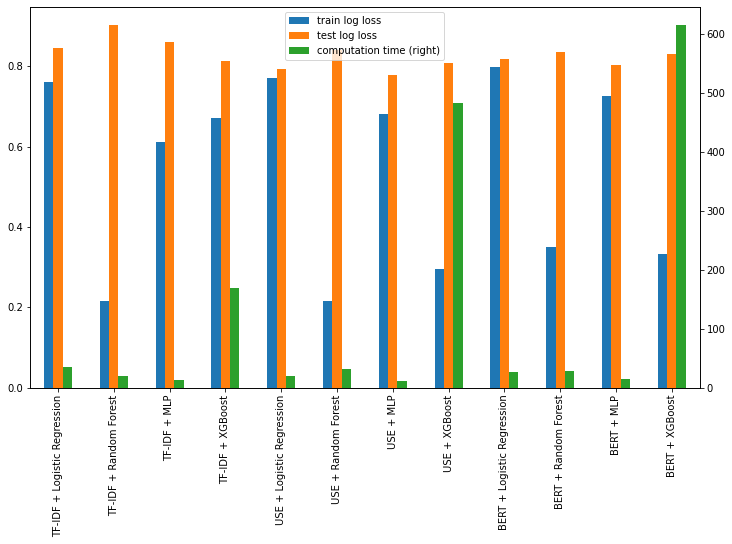

In [32]:
perfs = compare_classifiers(data_train, data_test, "discourse_effectiveness", list_vector, dict_classifiers)
plot_performances(perfs)

In [33]:
print(perfs.transpose()['test log loss'].sort_values())

USE + MLP                       0.778684
USE + Logistic Regression       0.793821
BERT + MLP                      0.803099
USE + XGBoost                   0.807825
TF-IDF + XGBoost                0.813730
BERT + Logistic Regression      0.817473
BERT + XGBoost                  0.829712
BERT + Random Forest            0.836201
USE + Random Forest             0.841378
TF-IDF + Logistic Regression    0.846175
TF-IDF + MLP                    0.861326
TF-IDF + Random Forest          0.902488
Name: test log loss, dtype: float64


<a id="7.6"></a>

#### <b>7.6 <span style='color:#4a8fdd'>|</span> Cross-Validation</b>

We will optimise some hyperparameters of the selected model via the <i>Cross-Validation</i> method. We also list ranges of parameters for other models for further works.

In [34]:
parameters_MLP = {
    'hidden_layer_sizes' : [(50,50,50), (50,100,50), (100,)],
    'activation' : ['logistic', 'relu'],
    'solver': ['adam'],
    'alpha' : [0.0001, 0.05],
    'random_state' : [42],
    'early_stopping' : [True],
    'validation_fraction' : [0.1],
}

parameters_LR = {
    'penalty' : ['l2'],
    'class_weight' : [None, 'balanced'],
    'random_state' : [42],
    'solver' : ['saga', 'lbfgs'],
    'multi_class' : ['auto'],
    'n_jobs' : [-1],
}

parameters_RF = {
    'n_estimators' : [50, 100, 200],
    'max_features' : ["sqrt", "log2"],
    'n_jobs' : [-1],
    'random_state' : [42],
    'class_weight' : [None, 'balanced'],
}

In [35]:
from sklearn.model_selection import GridSearchCV

def select_data(data_train, data_test, col_y, vect):
    X_train = pd.DataFrame(data_train[vect].dropna().tolist())
    X_test = pd.DataFrame(data_test[vect].dropna().tolist())
    LE = LabelEncoder()
    y_train = LE.fit_transform(data_train[col_y].iloc[X_train.index])
    y_test = LE.transform(data_test[col_y].iloc[X_test.index])
    return (X_train, y_train, X_test, y_test)

def cross_validation(X_train, y_train, classif, params):
    cross_val = GridSearchCV(classif(), params, scoring='neg_log_loss', n_jobs=-1)
    cross_val.fit(X_train, y_train)
    return cross_val.best_params_

In [36]:
(X_train, y_train, X_test, y_test) = select_data(data_train, data_test, 'discourse_effectiveness', 'USE')
global_model_best_params = cross_validation(X_train, y_train, MLPClassifier, parameters_MLP)

Now we simply construct the <i>optimal</i> global model, and check its performances.

In [37]:
def optimal_model(X_train, y_train, X_test, y_test, classif, params):
    model = classif(**params)
    model.fit(X_train, y_train)
    perform = performances(model, X_train, y_train, X_test, y_test)
    return (model, perform)

In [38]:
(global_model, scores) = optimal_model(X_train, y_train, X_test, y_test, MLPClassifier, global_model_best_params)
print("The global model gets a test log loss of {:.5f}".format(scores[1]))

The global model gets a test log loss of 0.77919


<a id="8"></a>

## <b>8 <span style='color:#4a8fdd'>|</span> SPLITTING TYPES</b>

The texts we have to classify belong to different types (<i>opening</i>, <i>claim</i>, etc) and the optimal approach may vary depending on the considered discourse type.

<a id="8.1"></a>

#### <b>8.1 <span style='color:#4a8fdd'>|</span> Models comparison</b>

We will split the dataset into the seven different subset based on the <i>discourse_type</i> variable, before comparing once again the basic performances of every couple <i>vectorization/classifier</i> on <b>each data subset</b>!

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


<AxesSubplot:>

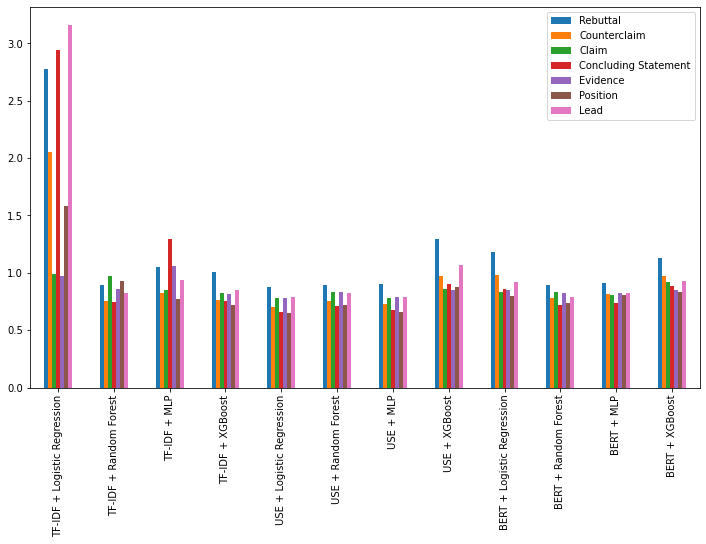

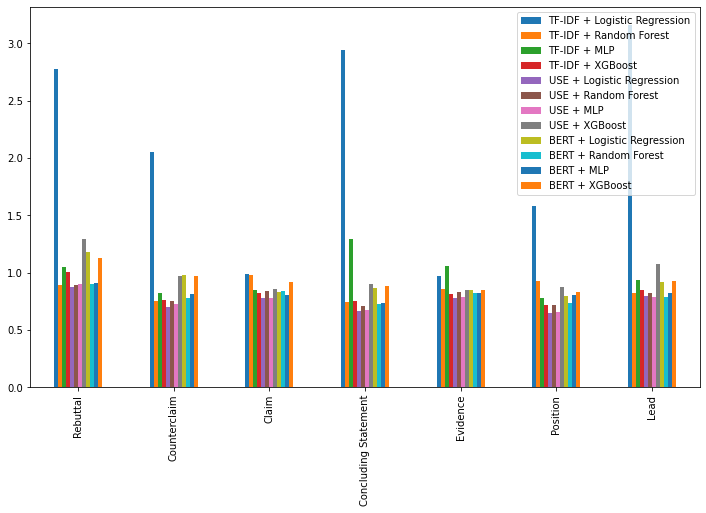

In [39]:
perfs = pd.DataFrame(columns = discourse_types)
for i in discourse_types:
    data_train_temp = data_train[data_train['discourse_type'] == i]
    data_test_temp = data_test[data_test['discourse_type'] == i]
    perfs[i] = compare_classifiers(data_train_temp, data_test_temp, 'discourse_effectiveness',
                                   list_vector, dict_classifiers).loc['test log loss']
perfs.plot(kind='bar', figsize=(12,7))
perfs.transpose().plot(kind='bar', figsize=(12,7))

In [40]:
for i in discourse_types:
    print(i, ":", perfs[i].sort_values().index[0])
    print("    log loss: {:.5f}".format(perfs[i].sort_values().iloc[0]))

Rebuttal : USE + Logistic Regression
    log loss: 0.87676
Counterclaim : USE + Logistic Regression
    log loss: 0.70034
Claim : USE + MLP
    log loss: 0.77668
Concluding Statement : USE + Logistic Regression
    log loss: 0.66264
Evidence : USE + Logistic Regression
    log loss: 0.77866
Position : USE + Logistic Regression
    log loss: 0.65022
Lead : BERT + Random Forest
    log loss: 0.78983


<a id="8.2"></a>

#### <b>8.2 <span style='color:#4a8fdd'>|</span> Cross-Validation</b>

Again we optimise the hyperparameters of the selected models via the <i>Cross-Validation</i> method, for <b>every</b> discourse type.

In [41]:
dict_best_combinations = {
    'Evidence' : ('USE', LogisticRegression, parameters_LR),
    'Lead' : ('BERT', RandomForestClassifier, parameters_RF),
    'Position' : ('USE', LogisticRegression, parameters_LR),
    'Counterclaim' : ('USE', LogisticRegression, parameters_LR),
    'Claim' : ('USE', MLPClassifier, parameters_MLP),
    'Rebuttal' : ('USE', LogisticRegression, parameters_LR),
    'Concluding Statement' : ('USE', LogisticRegression, parameters_LR),
}

In [42]:
split_parameters = {}
split_models = {}
split_scores = {}

for i in discourse_types:
    data_train_temp = data_train[data_train['discourse_type'] == i]
    data_test_temp = data_test[data_test['discourse_type'] == i]
    (X_train, y_train, X_test, y_test) = select_data(data_train_temp, data_test_temp,
                                                     'discourse_effectiveness', dict_best_combinations[i][0])
    split_parameters[i] = cross_validation(X_train, y_train, dict_best_combinations[i][1], dict_best_combinations[i][2])
    (split_models[i], split_scores[i]) = optimal_model(X_train, y_train, X_test, y_test,
                                    dict_best_combinations[i][1], split_parameters[i])
    print("The split model for ", i, " gets a test log loss of {:.5f}".format(split_scores[i][1]))


The split model for  Rebuttal  gets a test log loss of 0.87676
The split model for  Counterclaim  gets a test log loss of 0.70034
The split model for  Claim  gets a test log loss of 0.77321
The split model for  Concluding Statement  gets a test log loss of 0.66264
The split model for  Evidence  gets a test log loss of 0.77867
The split model for  Position  gets a test log loss of 0.65022
The split model for  Lead  gets a test log loss of 0.79044


<a id="8.3"></a>

#### <b>8.3 <span style='color:#4a8fdd'>|</span> Overall performances</b>

In order to compare them with the global model, we need to compute the log loss error <b>over the entire dataset</b> when we select the prediction model depending on the discourse type.

In [43]:
def split_models_predict_proba(X, col_type, dict_combinations, trained_models):
    vect_method = dict_combinations[X[col_type]][0]
    prediction = trained_models[X[col_type]].predict_proba([X[vect_method]])[0]
    return prediction

In [44]:
y_pred_split = data_test.apply(lambda x : split_models_predict_proba(x, 'discourse_type', dict_best_combinations, split_models), axis=1)

LE = LabelEncoder()
y_train = LE.fit_transform(data_train['discourse_effectiveness'])
y_test = LE.transform(data_test['discourse_effectiveness'])

split_overall_test_score = metrics.log_loss(y_test, np.array(y_pred_split.tolist()))
print("The split model gets an overall test log loss of {:.5f}".format(split_overall_test_score))

The split model gets an overall test log loss of 0.75253


The split model's loss is lower than the global model's one (0.77919) which means we get higher predictive power by splitting the training sets depending on the discourse types.

<a id="9"></a>

## <b>9 <span style='color:#4a8fdd'>|</span> MIXING THE MODELS</b>

<a id="9.1"></a>

#### <b>9.1 <span style='color:#4a8fdd'>|</span> Data subsets comparison</b>

We will check if the split model is better than the global model on its own restricted subset. If not, we will replace it by the global model (trained with <b>all</b> discourse types).

In [45]:
for i in discourse_types:
    data_train_temp = data_train[data_train['discourse_type'] == i]
    data_test_temp = data_test[data_test['discourse_type'] == i]
    (X_train, y_train, X_test, y_test) = select_data(data_train_temp, data_test_temp, 'discourse_effectiveness', 'USE')
    y_pred_temp = global_model.predict_proba(X_test)
    temp_score = metrics.log_loss(y_test, y_pred_temp)
    print("The global model restricted to ", i, " data gets a test log loss of {:.5f}".format(temp_score))
    if temp_score < split_scores[i][1]:
        print("      The corresponding split model had {:.5f} which is GREATER".format(split_scores[i][1]))
    else:
        print("      The corresponding split model had {:.5f}".format(split_scores[i][1]))

The global model restricted to  Rebuttal  data gets a test log loss of 0.84326
      The corresponding split model had 0.87676 which is GREATER
The global model restricted to  Counterclaim  data gets a test log loss of 0.70064
      The corresponding split model had 0.70034
The global model restricted to  Claim  data gets a test log loss of 0.78058
      The corresponding split model had 0.77321
The global model restricted to  Concluding Statement  data gets a test log loss of 0.72766
      The corresponding split model had 0.66264
The global model restricted to  Evidence  data gets a test log loss of 0.83253
      The corresponding split model had 0.77867
The global model restricted to  Position  data gets a test log loss of 0.65452
      The corresponding split model had 0.65022
The global model restricted to  Lead  data gets a test log loss of 0.81051
      The corresponding split model had 0.79044


<a id="9.2"></a>

#### <b>9.2 <span style='color:#4a8fdd'>|</span> Performances</b>

We will use the global model to predict the effectiveness of <i>Rebuttal</i> texts, and use the specific optimal algorithm for the other discourse types, before computing the log loss error on our test dataset for this brand new model.

In [46]:
def mixed_model_predict_proba(X, col_type, list_types_global, trained_models, dict_combinations):
    discourse_type = X[col_type]
    if discourse_type in list_types_global:
        discourse_type = 'Global'
    vect_method = dict_combinations[discourse_type][0]
    prediction = trained_models[discourse_type].predict_proba([X[vect_method]])[0]
    return prediction

In [47]:
list_types_global = ['Rebuttal']
split_models['Global'] = global_model
dict_best_combinations['Global'] = ('USE', MLPClassifier, parameters_MLP)

y_pred_mixed = data_test.apply(lambda x : mixed_model_predict_proba(x, 'discourse_type', list_types_global,
                                                                    split_models, dict_best_combinations), axis=1)

LE = LabelEncoder()
y_train = LE.fit_transform(data_train['discourse_effectiveness'])
y_test = LE.transform(data_test['discourse_effectiveness'])

mixed_overall_test_score = metrics.log_loss(y_test, np.array(y_pred_mixed.tolist()))
print("The split model gets an overall test log loss of {:.5f}".format(mixed_overall_test_score))

The split model gets an overall test log loss of 0.75140


The mixed model has a log loss error of 0.75140, which is lower than the global model's error 0.77919 and the split model's 0.75253.

<a id="9.3"></a>

#### <b>9.3 <span style='color:#4a8fdd'>|</span> Saving the parameters</b>

We will save the optimal parameters into a dictionary for the next section.

In [48]:
mixed_model_parameters = {}
mixed_model_parameters['Global'] = (True, dict_best_combinations['Global'][0],
                                    dict_best_combinations['Global'][1], global_model_best_params)

for i in discourse_types:
    if i in list_types_global:
        mixed_model_parameters[i] = mixed_model_parameters['Global']
    else:
        is_global = False
        vectorization_method = dict_best_combinations[i][0]
        classifier = dict_best_combinations[i][1]
        optimal_parameters = split_parameters[i]
        mixed_model_parameters[i] = (is_global, vectorization_method, classifier, optimal_parameters)

<a id="10"></a>

## <b>10 <span style='color:#4a8fdd'>|</span> MAKING THE PREDICTIONS</b>

<a id="10.1"></a>

#### <b>10.1 <span style='color:#4a8fdd'>|</span> Training the model</b>

Now we need to train our mixed model over all available data, according to the required subset splits.

In [49]:
dict_trained_models = {}
    
X_train_global = pd.DataFrame(data[mixed_model_parameters['Global'][1]].dropna().tolist())
LE = LabelEncoder()
y_train_global = LE.fit_transform(data['discourse_effectiveness'].iloc[X_train_global.index])
    
dict_trained_models['Global'] = mixed_model_parameters['Global'][2](**mixed_model_parameters['Global'][3]).fit(X_train_global, y_train_global)
    
for i in discourse_types:
    if mixed_model_parameters[i][0]:
        dict_trained_models[i] = dict_trained_models['Global']
    else :
        X_train_local = pd.DataFrame(data[mixed_model_parameters[i][1]].dropna().tolist())
        y_train_local = LE.transform(data['discourse_effectiveness'].iloc[X_train_local.index])
        
        dict_trained_models[i] = mixed_model_parameters[i][2](**mixed_model_parameters[i][3]).fit(X_train_local, y_train_local)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/m

<a id="10.2"></a>

#### <b>10.2 <span style='color:#4a8fdd'>|</span> Vectorizing test data</b>


In [50]:
test['clean_text'] = cleaning(test['discourse_text'])
test['cleaner_text'] = more_cleaning(test["clean_text"])

def tfidf_transform(tfidf_vectorizer, text_data):
    if not isinstance(text_data.iloc[0], list):
        text_data = tokenize(text_data)
    tfidf_vectors_csr = tfidf_vectorizer.transform(text_data)
    return (pd.Series(tfidf_vectors_csr.todense().tolist(), text_data.index))

test['TF-IDF'] = tfidf_transform(tfidf_vectorizer, test['cleaner_text'])
test['USE'] = test['clean_text'].apply(lambda x: use_vectorizer([x]).numpy()[0])
test['BERT'] = test['clean_text'].apply(lambda x: vectorize_text_BERT(x, model, tokenizer))

test.head()

discourse_id      essay_id  \
0  a261b6e14276  D72CB1C11673   
1  5a88900e7dc1  D72CB1C11673   
2  9790d835736b  D72CB1C11673   
3  75ce6d68b67b  D72CB1C11673   
4  93578d946723  D72CB1C11673   

                                      discourse_text discourse_type  \
0  Making choices in life can be very difficult. ...           Lead   
1  Seeking multiple opinions can help a person ma...       Position   
2                     it can decrease stress levels           Claim   
3             a great chance to learn something new           Claim   
4               can be very helpful and beneficial.           Claim   

                                          clean_text  \
0  Making choices in life can be very difficult. ...   
1  Seeking multiple opinions can help a person ma...   
2                     it can decrease stress levels    
3             a great chance to learn something new    
4               can be very helpful and beneficial.    

                                        cleaner_text  \
0  making choice life difficult people often ask ...   
1  seeking multiple opinion help person make bett...   
2                             decrease stress level    
3                  great chance learn something new    
4                                helpful beneficial    

                                              TF-IDF  \
0  [0.0, 0.0, 0.0, 5.623450825709936, 0.0, 0.0, 0...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                 USE  \
0  [0.06603771, -0.09860633, -0.051160365, 0.0537...   
1  [0.053892903, -0.08815119, -0.005697915, -0.02...   
2  [0.03133019, -0.033790812, 0.037156615, -0.011...   
3  [0.03779467, -0.08106937, -0.009648181, -0.101...   
4  [-0.020623013, -0.058451124, -0.016742075, -0....   

                                                BERT  
0  [0.2694228, -0.24830848, -0.045328047, -0.2178...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.51037973, -0.26412082, 0.08364717, -0.13737...

<a id="10.3"></a>

#### <b>10.3 <span style='color:#4a8fdd'>|</span> Generating predictions</b>

We predict the discourse effectiveness of the test dataset.

In [51]:
def trained_mixed_model_predict_proba(X, col_type, mixed_model_parameters, dict_trained_models):
    discourse_type = X[col_type]
    vect_method = mixed_model_parameters[discourse_type][1]
    prediction = dict_trained_models[discourse_type].predict_proba([X[vect_method]])[0]
    return prediction

test['prediction'] = test.apply(lambda x : trained_mixed_model_predict_proba(x, 'discourse_type', mixed_model_parameters,
                                                                     dict_trained_models), axis=1)

test.head()

discourse_id      essay_id  \
0  a261b6e14276  D72CB1C11673   
1  5a88900e7dc1  D72CB1C11673   
2  9790d835736b  D72CB1C11673   
3  75ce6d68b67b  D72CB1C11673   
4  93578d946723  D72CB1C11673   

                                      discourse_text discourse_type  \
0  Making choices in life can be very difficult. ...           Lead   
1  Seeking multiple opinions can help a person ma...       Position   
2                     it can decrease stress levels           Claim   
3             a great chance to learn something new           Claim   
4               can be very helpful and beneficial.           Claim   

                                          clean_text  \
0  Making choices in life can be very difficult. ...   
1  Seeking multiple opinions can help a person ma...   
2                     it can decrease stress levels    
3             a great chance to learn something new    
4               can be very helpful and beneficial.    

                                        cleaner_text  \
0  making choice life difficult people often ask ...   
1  seeking multiple opinion help person make bett...   
2                             decrease stress level    
3                  great chance learn something new    
4                                helpful beneficial    

                                              TF-IDF  \
0  [0.0, 0.0, 0.0, 5.623450825709936, 0.0, 0.0, 0...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                 USE  \
0  [0.06603771, -0.09860633, -0.051160365, 0.0537...   
1  [0.053892903, -0.08815119, -0.005697915, -0.02...   
2  [0.03133019, -0.033790812, 0.037156615, -0.011...   
3  [0.03779467, -0.08106937, -0.009648181, -0.101...   
4  [-0.020623013, -0.058451124, -0.016742075, -0....   

                                                BERT  \
0  [0.2694228, -0.24830848, -0.045328047, -0.2178...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.51037973, -0.26412082, 0.08364717, -0.13737...   

                                          prediction  
0                               [0.355, 0.625, 0.02]  
1  [0.5302114984167275, 0.44018934730946574, 0.02...  
2               [0.64529103, 0.28200823, 0.07270075]  
3                [0.45821851, 0.4036505, 0.13813107]  
4                [0.6783124, 0.23433678, 0.08735084]

In [52]:
labels = LE.inverse_transform([0,1,2])
predictions = pd.DataFrame(test['prediction'].tolist(), columns = labels, index = test.index)
predictions['discourse_id'] = test['discourse_id']
predictions.head()

Adequate  Effective  Ineffective  discourse_id
0  0.355000   0.625000     0.020000  a261b6e14276
1  0.530211   0.440189     0.029599  5a88900e7dc1
2  0.645291   0.282008     0.072701  9790d835736b
3  0.458219   0.403650     0.138131  75ce6d68b67b
4  0.678312   0.234337     0.087351  93578d946723

In [53]:
predictions[['discourse_id', 'Ineffective', 'Adequate', 'Effective']].to_csv('submission.csv', index=False)